In [17]:
import librosa
import librosa.display
from matplotlib import pyplot as plt
import numpy as np

# Load the audio file
audio_path = 'output.wav'
y, sr = librosa.load(audio_path)

# Compute the spectrogram
S = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=512)

# Convert to decibels
S_dB = librosa.power_to_db(S, ref=np.max)

# Plot the spectrogram
librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr, hop_length=512)
#plt.colorbar(format='%+2.0f dB')
plt.title('Mel-frequency spectrogram')
plt.savefig("Mel-frequency-spectrogram_fast_talk.png")

In [6]:
import matplotlib


In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [28]:
img = cv2.imread('Mel-frequency-spectrogram_fast_talk.png')

(480, 640, 3)


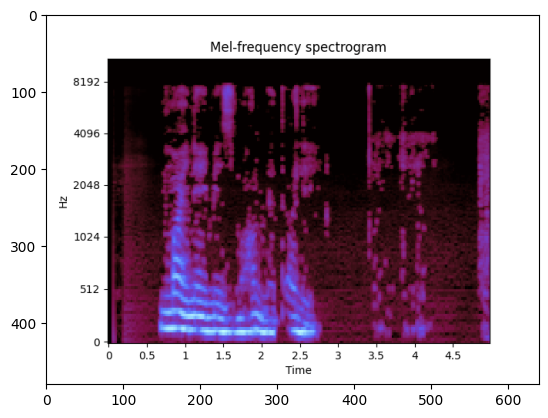

In [29]:
print(img.shape)
plt.imshow(img)

In [30]:
img = np.float32(img) / 255.0
# Calculate the kernel density estimation for each pixel
img_flat = img.reshape(-1, 3)
print(img_flat.shape)

(307200, 3)


In [31]:
kde = cv2.ml.EM_create()

In [81]:
kernel_size = 5
kde.setClustersNumber(kernel_size)

In [82]:
kde.trainEM(img_flat)

(True,
 array([[50.35128215],
        [50.35128215],
        [50.35128215],
        ...,
        [50.35128215],
        [50.35128215],
        [50.35128215]]),
 array([[1],
        [1],
        [1],
        ...,
        [1],
        [1],
        [1]], dtype=int32),
 array([[0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         2.68643425e-25],
        [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         2.68643425e-25],
        [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         2.68643425e-25],
        ...,
        [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         2.68643425e-25],
        [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         2.68643425e-25],
        [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         2.68643425e-25]]))

In [83]:
img_flat.shape

(307200, 3)

In [84]:
img_predicted=kde.predict(img_flat)[1]

In [85]:
img_flat

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       ...,
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]], dtype=float32)

In [86]:
img_predicted

array([[0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        2.68643425e-25],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        2.68643425e-25],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        2.68643425e-25],
       ...,
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        2.68643425e-25],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        2.68643425e-25],
       [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        2.68643425e-25]])

In [87]:
density = np.asarray(img_predicted).reshape(-1)
density

array([0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
       0.00000000e+00, 0.00000000e+00, 2.68643425e-25])

In [92]:
img.shape

(480, 640, 3)

In [101]:
x=density.reshape((480, 640, 5))
x

array([[[0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         2.68643425e-25],
        [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         2.68643425e-25],
        [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         2.68643425e-25],
        ...,
        [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         2.68643425e-25],
        [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         2.68643425e-25],
        [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         2.68643425e-25]],

       [[0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         2.68643425e-25],
        [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         2.68643425e-25],
        [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
         2.68643425e-25],
        ...,
        [0.00000000e+00, 1.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        

In [107]:
global_density = np.mean(x)
global_density

0.2

In [108]:
global_density = np.mean(x)
contrast = np.abs(density - global_density) / global_density


In [109]:
global_density, contrast

(0.2, array([1., 4., 1., ..., 1., 1., 1.]))

In [110]:
def adjust_color_values(img, density, contrast):
    # Adjust the color values of each pixel based on the local color distributions and contrast
    img_out = np.zeros_like(img)
    for i in range(3):
        img_flat = img[:,:,i].flatten()
        density_flat = density.flatten()
        img_flat_out = np.interp(img_flat, (img_flat.min(), img_flat.max()), (0, 1))
        img_flat_out = np.interp(img_flat_out, (0, 1), (img_flat_out.mean()-contrast*density_flat, img_flat_out.mean()+contrast*density_flat))
        img_out[:,:,i] = img_flat_out.reshape(img.shape[:2])
    return img_out

In [112]:
img_out = adjust_color_values(img, global_density, contrast)

# Apply post-processing
img_out = cv2.cvtColor(img_out, cv2.COLOR_BGR2RGB)
img_out = cv2.GaussianBlur(img_out, (3, 3), 0)
img_out = cv2.cvtColor(img_out, cv2.COLOR_RGB2BGR)


ValueError: object too deep for desired array

In [5]:
def adjust_color_values(img, density, contrast):
    # Adjust the color values of each pixel based on the local color distributions and contrast
    img_out = np.zeros_like(img)
    for i in range(3):
        img_flat = img[:,:,i].flatten()
        density_flat = density.flatten()
        img_flat_out = np.interp(img_flat, (img_flat.min(), img_flat.max()), (0, 1))
        img_flat_out = np.interp(img_flat_out, (0, 1), (img_flat_out.mean()-contrast*density_flat, img_flat_out.mean()+contrast*density_flat))
        img_out[:,:,i] = img_flat_out.reshape(img.shape[:2])
    return img_out

# Load the image


# Estimate the local color distributions
density = kernel_density_estimation(img, kernel_size=5)

# Calculate the contrast of each region
global_density = np.mean(density)
contrast = np.abs(density - global_density) / global_density

# Adjust the color values
img_out = adjust_color_values(img, density, contrast)

# Apply post-processing
img_out = cv2.cvtColor(img_out, cv2.COLOR_BGR2RGB)
img_out = cv2.GaussianBlur(img_out, (3, 3), 0)
img_out = cv2.cvtColor(img_out, cv2.COLOR_RGB2BGR)

# Display the results
cv2.imshow('Input Image', img)
cv2.imshow('Enhanced Image', img_out)
cv2.waitKey(0)
cv2.destroyAllWindows()


C:\Users\alini\AppData\Local\Temp\ipykernel_3632\1066942093.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  density = np.asarray(kde.predict(img_flat)).reshape(-1)


ValueError: cannot reshape array of size 2 into shape (480,640)